# Two Layer LSTM

We will train the following number of cells for a Two-Layer LSTM: 

In [1]:
import torch 
from torch import nn 
import numpy as np
import argparse
from Dataset import FairytalesDataset
from torch import nn, optim
from torch.utils.data import DataLoader
from train import save_checkpoint, load_checkpoint, train
from models import Lstm_model
from test import predict 
import time

In [2]:
DIR_PATH = "data/fairytales.txt"
START_TOKEN = "<s>"
END_TOKEN = "</s>"

parser = argparse.ArgumentParser()
parser.add_argument('--max-epochs', type=int, default=0)
parser.add_argument('--batch-size', type=int, default=256)
parser.add_argument('--sequence_length', type=int, default=7)
args, unknown = parser.parse_known_args()

dataset = FairytalesDataset(DIR_PATH, START_TOKEN, END_TOKEN, args)
print(dataset.__getitem__(3))
print('Vocab:', len(dataset.unique_words))

(tensor([ 53,   9,  73,   6,  19, 149,  40]), tensor([  9,  73,   6,  19, 149,  40,  93]))
Vocab: 3028


## 1. 128 cells

In [3]:
model = Lstm_model(dataset, lstm_size = 128, num_layers = 2)

In [4]:
start_time = time.time()

loss_hist = train(dataset, model, args, ckpt_filename='two_layer_lstm/128.tar',
      load_model=True, save_epochs=2)

end_time = time.time()
elapsed_time = end_time - start_time
print("Elapsed time: ", elapsed_time) 

-> Loading checkpoint
Elapsed time:  0.03315091133117676


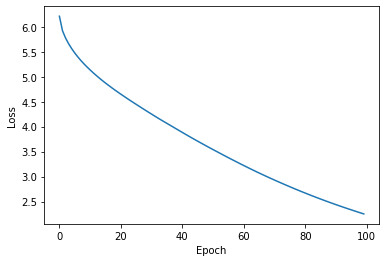

In [5]:
import matplotlib.pyplot as plt

exp = torch.load('two_layer_lstm/128.tar')
loss_history = exp["loss_history"]
plt.plot(range(len(loss_history)), loss_history) # trained for 60 epochs
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [6]:
text,sent_perplexity = predict(dataset, model, text='this is a story about', next_words=100)

print('Generated text:')
print(' ')
print(text)
print(' ')
print('Number of sentences:', len(sent_perplexity))
print(' ')
print('Perplexity per sentence:', sent_perplexity)
print(' ')
print('Average sentence perplexity:', sum(sent_perplexity) / len(sent_perplexity))

Generated text:
 
<s> this is a story about last fly was when this when careful home all i really have a years only shook the ground </s> <s> he cut off his daughter to get for him and there was a christening arrows ran high his more man sprang a hole in him but happened for all the king saw that the queen was more than before </s> <s> wondered to dinner next words she had ridden his flute orders that he had all the best pleased him happy in the mill but only two of his son all each two as a little took man in each </s>
 
Number of sentences: 3
 
Perplexity per sentence: [3.107249210540422, 1.864145669980731, 1.8760510746512928]
 
Average sentence perplexity: 2.282481985057482


## 2. 256 cells

In [7]:
model2 = Lstm_model(dataset, lstm_size = 256, num_layers = 2)

In [8]:
start_time = time.time()

loss_hist = train(dataset, model2, args, ckpt_filename='two_layer_lstm/256.tar',
      load_model=True, save_epochs=2)

end_time = time.time()
elapsed_time = end_time - start_time
print("Elapsed time: ", elapsed_time) 

-> Loading checkpoint
Elapsed time:  0.06868791580200195


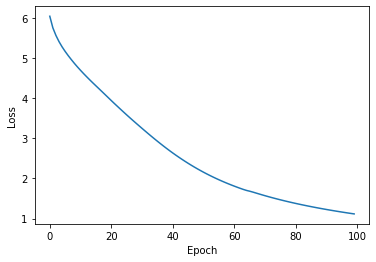

In [9]:
import matplotlib.pyplot as plt

exp = torch.load('two_layer_lstm/256.tar')
loss_history = exp["loss_history"]
plt.plot(range(len(loss_history)), loss_history) # trained for 60 epochs
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [10]:
text,sent_perplexity = predict(dataset, model2, text='this is a story about', next_words=100)

print('Generated text:')
print(' ')
print(text)
print(' ')
print('Number of sentences:', len(sent_perplexity))
print(' ')
print('Perplexity per sentence:', sent_perplexity)
print(' ')
print('Average sentence perplexity:', sum(sent_perplexity) / len(sent_perplexity))

Generated text:
 
<s> this is a story about monster king shook his head and she said in the place on the side of the forest had seen himself </s> <s> only one day he came back and in order to a stable where he thought he was so taking for instead of his kingdom in his life his thoughts did not even twenty troops in greeting </s> <s> he has feel we want </s> <s> as use of a sudden it and answered the prince if i am waiting for you o prince and the next minute he reared himself out of the water huge and horrible to </s>
 
Number of sentences: 4
 
Perplexity per sentence: [1.3122141251885846, 1.2655729185356512, 1.2935545465986127, 0.5762492480834887]
 
Average sentence perplexity: 1.1118977096015843


## 3. 512 cells 

In [15]:
model3 = Lstm_model(dataset, lstm_size = 512, num_layers = 2)

In [16]:
start_time = time.time()

train(dataset, model3, args, ckpt_filename='two_layer_lstm/512.tar',
      load_model=True, save_epochs=2)

end_time = time.time()
elapsed_time = end_time - start_time
print("Elapsed time: ", elapsed_time) 

-> Loading checkpoint
Elapsed time:  0.15625619888305664


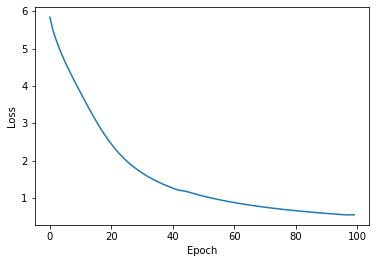

In [17]:
import matplotlib.pyplot as plt

exp = torch.load('two_layer_lstm/512.tar')
loss_history = exp["loss_history"]
plt.plot(range(len(loss_history)), loss_history) # trained for 60 epochs
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [20]:
text,sent_perplexity = predict(dataset, model3, text='this is a story about', next_words=100)

print('Generated text:')
print(' ')
print(text)
print(' ')
print('Number of sentences:', len(sent_perplexity))
print(' ')
print('Perplexity per sentence:', sent_perplexity)
print(' ')
print('Average sentence perplexity:', sum(sent_perplexity) / len(sent_perplexity))

Generated text:
 
<s> this is a story about dale men till they reached the other side as he was going and led out to his house </s> <s> they gathered round to admire his beauty and whispered one to the king it had not been for him the young man would have remained poor all the days of his life </s> <s> now the king did not fly about the magician and the queen said nothing but kept watch else there is to the castle but no sooner was just as the king wished </s> <s> the rope however was there to be who said he had done </s>
 
Number of sentences: 4
 
Perplexity per sentence: [1.4828466180257038, 0.25671450414162367, 1.2392532360797384, 1.8940854294627252]
 
Average sentence perplexity: 1.2182249469274478
